In [15]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline



path_to_insults = '/Users/dattasainathd/Downloads/'
data2 = pd.read_csv(path_to_insults + 'final_train_bot.csv',na_values='0', encoding = "ISO-8859-1", nrows = 1320)

data2['no'] = 0
for x in range(0,data2.shape[0]):
    data2.loc[x, 'no']=x
print("Made a serial column which can be used for plotting purposes")  

print("Initializing two rows of Value with 0 & user with 1")
data2['Value'] = 1
data2['bot'] = 1


Made a serial column which can be used for plotting purposes
Initializing two rows of Value with 0 & user with 1


In [16]:
print("Doing all the necessary changes for the data for evaluation")

data2 = data2.drop('created_at', axis=1)
data2.verified=data2.verified.astype(int)
data2.default_profile=data2.default_profile.astype(int)
data2.default_profile_image=data2.default_profile_image.astype(int)

data2 = data2.drop('status', axis=1)
data2 = data2.drop('id', axis=1)
data2 = data2.drop('id_str', axis=1)
data2 = data2.drop('url', axis=1)
#data2 = data2[data2.verified != 1]
data2 = data2.drop('has_extended_profile', axis=1)

data2.location.fillna('', inplace=True)
data2.description.fillna('', inplace=True)
data2.followers_count.fillna(0, inplace=True)
data2.friends_count.fillna(0, inplace=True)
data2.listedcount.fillna(0, inplace=True)
data2.statuses_count.fillna(0, inplace=True)
data2.favourites_count.fillna(0, inplace=True)
data2.followers_count=data2.followers_count.astype(int)

print("Did all the necessary changes for the data for evaluation")

Doing all the necessary changes for the data for evaluation
Did all the necessary changes for the data for evaluation


In [17]:
print("Checking for the 'bot' word")
data_description = data2['description'].str.lower()
data_name = data2['name'].str.lower()
data_screen_name = data2['screen_name'].str.lower()
bot = 'bot'

print("Checking for the 'bot' word in the screen names of the accounts")
count = 0
serial = -1
for x in data_screen_name:
    serial = serial + 1
    if bot in x:
        data2.ix[serial, 'Value'] = 2
        count += 1
serial = -1

print("No.of accounts which had 'bot' in screen name: ", count)
print("accuracy", count/data2.shape[0])

print("Checking for the 'bot' word in the names of the accounts")
count2 = 0
for x in data_name:
    serial = serial + 1
    try:
        if bot in x:
            data2.ix[serial, 'Value'] = 2
            count2 += 1
    except:
        pass
print("No.of accounts which had 'bot' in names: ", count2)
print("accuracy", count2/data2.shape[0])
serial = -1
print("Checking for the 'bot' word in the description of the accounts")
count3 = 0
for x in data_description:
    serial = serial + 1
    try:
        if bot in x:
            data2.ix[serial, 'Value'] = 2
            count3 += 1
    except:
        pass
print("No.of accounts which had 'bot' in names: ", count3)
print("accuracy", count3/data2.shape[0])

print("trying to search for 'bot' in names, screen_names & description")
print("if existed, we shall change value to 2")
print("total no of accounts with bot word in it",max(count,count2,count3))

print("total accuracy for bot word", (max(count, count2, count3))/data2.shape[0])

Checking for the 'bot' word
Checking for the 'bot' word in the screen names of the accounts
No.of accounts which had 'bot' in screen name:  220
accuracy 0.16666666666666666
Checking for the 'bot' word in the names of the accounts
No.of accounts which had 'bot' in names:  191
accuracy 0.14469696969696969
Checking for the 'bot' word in the description of the accounts
No.of accounts which had 'bot' in names:  388
accuracy 0.29393939393939394
trying to search for 'bot' in names, screen_names & description
if existed, we shall change value to 2
total no of accounts with bot word in it 388
total accuracy for bot word 0.29393939393939394


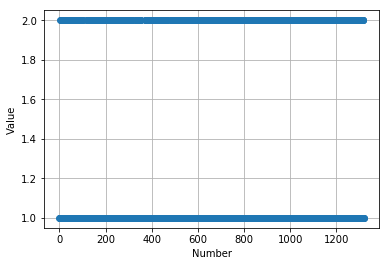

In [18]:
#plotting graph for bot word

plt.plot(data2['no'],data2['Value'],'o')
plt.xlabel('Number')
plt.ylabel('Value')
#axes.set_xlim([1,data2.shape[0]])
#axes.set_ylim([1,3])
plt.grid(True)

In [19]:
#trying to remove accounts with zero followers/zero friends/zero tweets
#Bias obtained from given data

serial = -1
count = 0
unnec = []
for x in range(0, data2.shape[0]):
    try:
        serial = serial + 1
        if(data2.loc[serial, 'Value']==1):
            if(data2.loc[serial, 'statuses_count']==0 or data2.loc[serial, 'followers_count']==0 or 
               data2.loc[serial, 'friends_count']==0 ):
                data2.loc[serial, 'Value'] = 3
                count+=1
                
            
    except:
        pass
print("trying to search for accounts with followers, friends or tweets in 0")
print("if there is some accounts like that we will consider them as 'starter' humans and assign value 3")
print("total no. of accounts found with either zero follower or tweets or friends",count)
print("accuracy", count/data2.shape[0])

trying to search for accounts with followers, friends or tweets in 0
if there is some accounts like that we will consider them as 'starter' humans and assign value 3
total no. of accounts found with either zero follower or tweets or friends 253
accuracy 0.19166666666666668


In [20]:
#trying to filter accounts usually used by comman man (not celebrities or verified users)
serial = -1
count = 0
unnec = []
for x in range(0, data2.shape[0]):
    try:
        serial = serial + 1
        if(data2.loc[serial, 'Value']==1):
            if((data2.loc[serial, 'statuses_count']/data2.loc[serial, 'followers_count']<12 
                and data2.loc[serial, 'statuses_count']/data2.loc[serial, 'friends_count']<12)):
                data2.loc[serial, 'Value'] = 3
                count+= 1
    except:
        pass
print("trying to filter accounts usually used by comman man (not celebrities or verified users)")
print("comman users have low tweet/following or tweet/friends and assigned value 3")
print("total no. of normal/comman users: ",count)
print("accuracy", count/data2.shape[0])

trying to filter accounts usually used by comman man (not celebrities or verified users)
comman users have low tweet/following or tweet/friends and assigned value 3
total no. of normal/comman users:  220
accuracy 0.16666666666666666


plotting graph to display the ratio of tweets to followers and friends


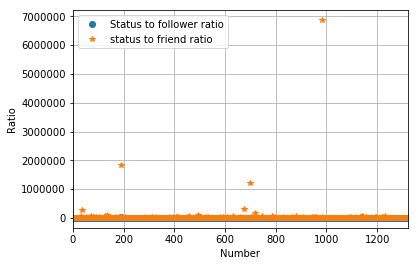

In [21]:
plt.plot(data2['no'],data2['statuses_count']/data2['followers_count'],'o', label = 'Status to follower ratio')
plt.xlabel('Number')
plt.ylabel('tweets to followers ratio')
axes = plt.gca()
axes = plt.gca()
axes.set_xlim([0,data2.shape[0]])

plt.grid(True)
plt.plot(data2['no'],data2['statuses_count']/data2['friends_count'],'*', label = "status to friend ratio")
plt.xlabel('Number')
plt.ylabel('Ratio')
plt.legend()
axes = plt.gca()
axes = plt.gca()
#axes.set_xlim([0,50])
#axes.set_ylim([0,4])
plt.grid(True)
print("plotting graph to display the ratio of tweets to followers and friends")

plotting graph at a lower ratio of ratio of tweets to followers and friends


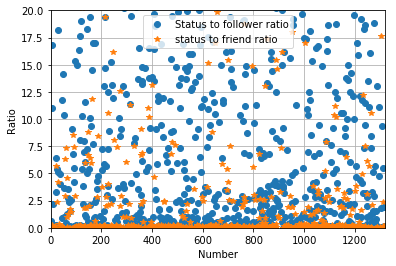

In [22]:
plt.plot(data2['no'],data2['statuses_count']/data2['followers_count'],'o', label = 'Status to follower ratio')
plt.xlabel('Number')
plt.ylabel('tweets to followers ratio')
axes = plt.gca()
axes = plt.gca()
axes.set_xlim([0,data2.shape[0]])
axes.set_ylim([0,20])

plt.grid(True)
plt.plot(data2['no'],data2['statuses_count']/data2['friends_count'],'*', label = "status to friend ratio")
plt.xlabel('Number')
plt.ylabel('Ratio')
plt.legend()
axes = plt.gca()
axes = plt.gca()
axes.set_ylim([0,20])
#axes.set_xlim([0,50])
#axes.set_ylim([0,4])
plt.grid(True)
print("plotting graph at a lower ratio of ratio of tweets to followers and friends")

In [23]:
#trying to filter accounts which are verified all the verified user accounts are humans
#because twitter verifies users only 
serial = -1
count = 0
unnec = []
for x in range(0, data2.shape[0]):
    try:
        serial = serial + 1
        if(data2.loc[serial, 'verified']==1):
            data2.loc[serial, 'Value'] = 3
            count+= 1
    except:
        pass
print("trying to filter accounts which are verified all the verified user accounts are humans")
print("twitter user accounts which are verified are assigned to value 3")
print("total no. of verified users:", count)
print("accuracy", count/data2.shape[0])

trying to filter accounts which are verified all the verified user accounts are humans
twitter user accounts which are verified are assigned to value 3
total no. of verified users: 8
accuracy 0.006060606060606061


plotting graph to display the verified users


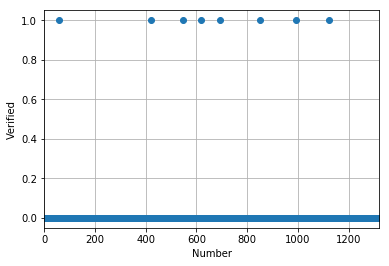

In [24]:
plt.plot(data2['no'],data2['verified'],'o')
plt.xlabel('Number')
plt.ylabel('Verified')
axes = plt.gca()
axes = plt.gca()
axes.set_xlim([0,data2.shape[0]])
plt.grid(True)

print("plotting graph to display the verified users")

In [25]:
#there might be some clever bots who dont have any description but follow huge number of poeople or they are followed
#by huge number.
serial = -1
count = 0
unnec = []
for x in range(0, data2.shape[0]):
    try:
        serial = serial + 1
        if(data.loc[serial, 'Value']==1 or data.loc[serial, 'Value']==2):
            if((data2.loc[serial, 'statuses_count']/data2.loc[serial, 'followers_count']>10 
                or data2.loc[serial, 'statuses_count']/data2.loc[serial, 'friends_count']>10)):
                data2.loc[serial, 'Value'] = 2
                count+= 1
    except:
        pass
print("huge tweeting accounts")
print("huge rate tweet accounts are considered bots and retained values 2")
print("total no. of clever bots are:", count)
print("accuracy", count/data2.shape[0])

huge tweeting accounts
huge rate tweet accounts are considered bots and retained values 2
total no. of clever bots are: 0
accuracy 0.0


plotting graph to display the ratio of tweets to followers and friends


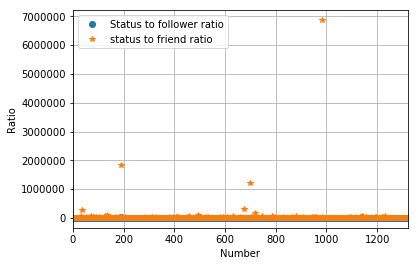

In [26]:
plt.plot(data2['no'],data2['statuses_count']/data2['followers_count'],'o', label = 'Status to follower ratio')
plt.xlabel('Number')
plt.ylabel('tweets to followers ratio')
axes = plt.gca()
axes = plt.gca()
axes.set_xlim([0,data2.shape[0]])

plt.grid(True)
plt.plot(data2['no'],data2['statuses_count']/data2['friends_count'],'*', label = "status to friend ratio")
plt.xlabel('Number')
plt.ylabel('Ratio')
plt.legend()
axes = plt.gca()
axes = plt.gca()
#axes.set_xlim([0,50])
#axes.set_ylim([0,4])
plt.grid(True)
print("plotting graph to display the ratio of tweets to followers and friends")

In [27]:
print("preparing data for calculation of accuracy")
serial = -1
count = 0
unnec = []
for x in range(0, data2.shape[0]):
    try:
        serial = serial + 1
        if(data2.loc[serial, 'Value']==3):
            data2.loc[serial, 'Value'] = 0
        else:
            data2.loc[serial, 'Value'] = 1
        count+= 1
    except:
        pass
print("completely prepared data for accuracy calculation")

preparing data for calculation of accuracy
completely prepared data for accuracy calculation


In [28]:
data_value = data2['Value']
datafinal = data2['bot']
print("Accuracy Score: ", (accuracy_score(datafinal, data_value)))
cnf_matrix = confusion_matrix(datafinal, data_value)
print("Confusion Matrix:")
print(cnf_matrix)

Accuracy Score:  0.640151515152
Confusion Matrix:
[[  0   0]
 [475 845]]


In [29]:
TP = 0
FP = 0
TN = 0
FN = 0
for i in range(len(data_value)): 
    if datafinal[i]==data_value[i]==1:
        TP += 1
        #print(i)
for i in range(len(data_value)): 
    if data_value[i]==1 and datafinal[i]!=data_value[i]:
        FP += 1
        #print(i)
for i in range(len(data_value)): 
    if datafinal[i]==data_value[i]==0:
        TN += 1
        #print(i)
for i in range(len(data_value)): 
    if data_value[i]==0 and datafinal[i]!=data_value[i]:
        FN += 1
        #print(i)